In [1]:
import pandas as pd
print("Pandas version:", pd.__version__)

Pandas version: 2.3.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


In [4]:
# load dataset
df = pd.read_csv("kc_house_data.csv")

# preview first 5 rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# check column names, data types, missing values
df.info()

# summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
# convert 'date' to datetime (first 8 chars are YYYYMMDD)
df['date'] = pd.to_datetime(df['date'].astype(str).str[:8], format='%Y%m%d', errors='coerce')

# add month & year for later analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


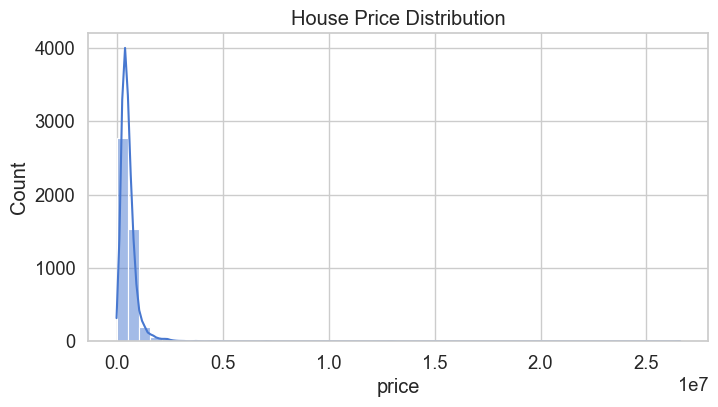

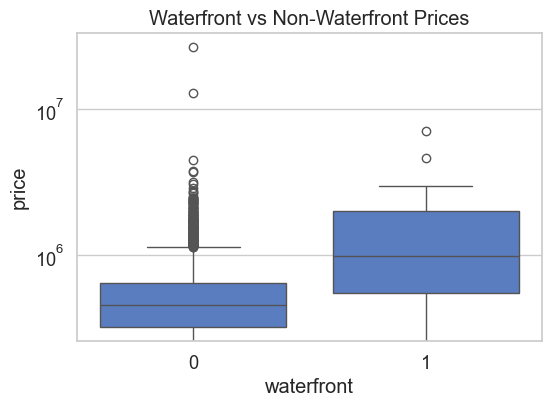

In [7]:
# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

# Waterfront vs Non-Waterfront
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='price', data=df)
plt.yscale("log")  # better view
plt.title("Waterfront vs Non-Waterfront Prices")
plt.show()


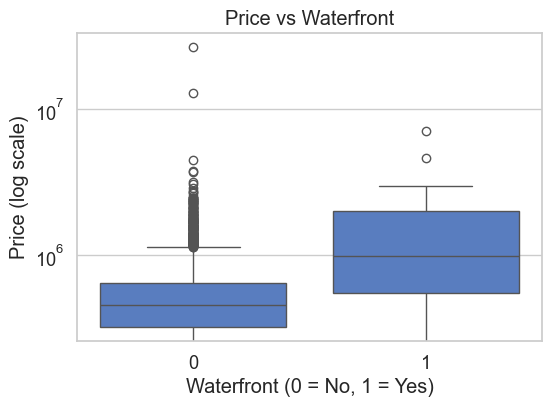

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x="waterfront", y="price", data=df)
plt.yscale("log")  # use log scale so expensive houses don’t squash the rest
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price (log scale)")
plt.title("Price vs Waterfront")
plt.show()


In [12]:
print(df.columns.tolist())

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country', 'year', 'month']


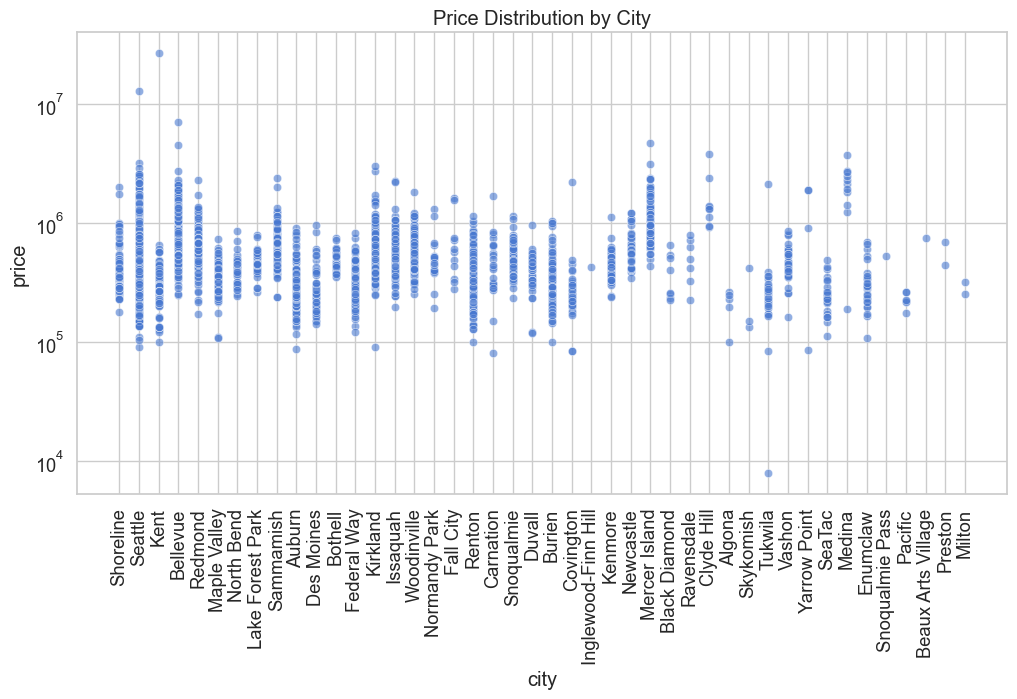

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="city", y="price", data=df, alpha=0.6)
plt.xticks(rotation=90)  # rotate city names
plt.yscale("log")
plt.title("Price Distribution by City")
plt.show()


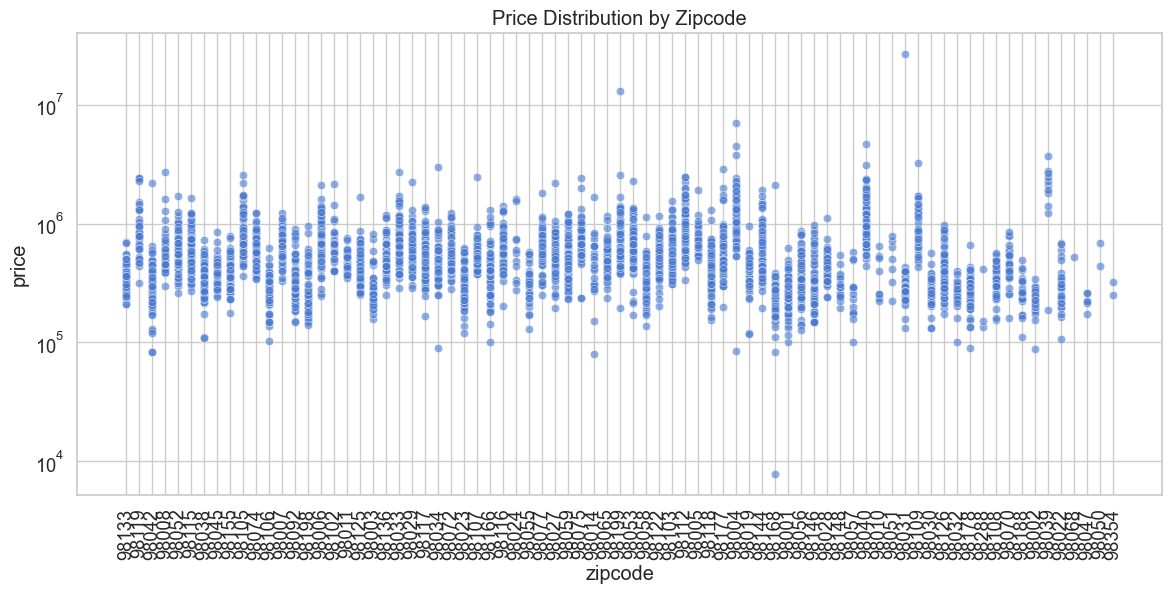

In [14]:
# extract zip code from statezip (keep last part)
df["zipcode"] = df["statezip"].str.split().str[-1]

plt.figure(figsize=(14,6))
sns.scatterplot(x="zipcode", y="price", data=df, alpha=0.6)
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Price Distribution by Zipcode")
plt.show()


city
Medina                2.046559e+06
Clyde Hill            1.321945e+06
Yarrow Point          1.194838e+06
Mercer Island         1.123818e+06
Bellevue              8.471807e+05
Beaux Arts Village    7.450000e+05
Fall City             6.926818e+05
Sammamish             6.869176e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64


/var/folders/_q/76pwm7914jvgx8rsdv2bzj_40000gn/T/ipykernel_23649/1382878649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")


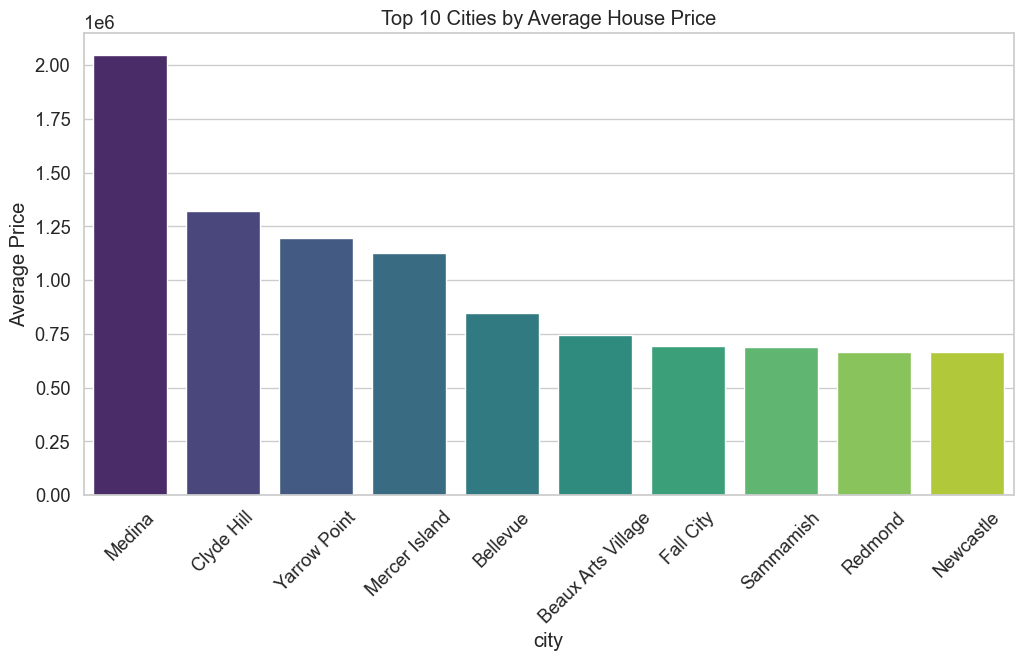

In [15]:
top_cities = df.groupby("city")["price"].mean().sort_values(ascending=False).head(10)
print(top_cities)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average House Price")
plt.ylabel("Average Price")
plt.show()


zipcode
98039    2.046559e+06
98004    1.317106e+06
98040    1.123818e+06
98109    1.049846e+06
98112    1.001604e+06
98199    9.431587e+05
98119    9.144415e+05
98105    9.136670e+05
98033    8.164085e+05
98006    7.930526e+05
Name: price, dtype: float64


/var/folders/_q/76pwm7914jvgx8rsdv2bzj_40000gn/T/ipykernel_23649/2392196547.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zips.index, y=top_zips.values, palette="plasma")


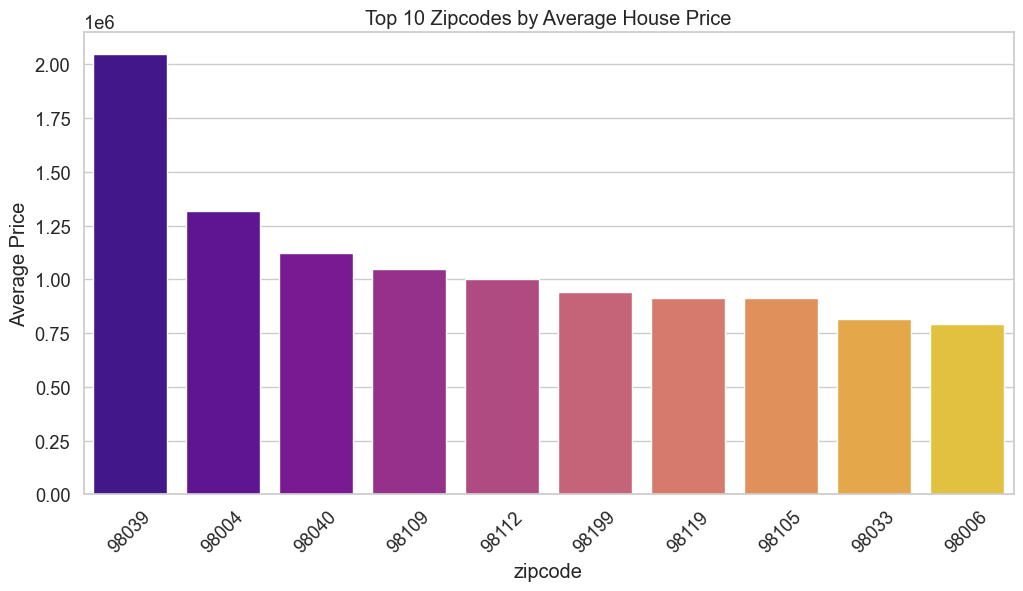

In [16]:
# create zipcode column
df["zipcode"] = df["statezip"].str.split().str[-1]

top_zips = df.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10)
print(top_zips)

plt.figure(figsize=(12,6))
sns.barplot(x=top_zips.index, y=top_zips.values, palette="plasma")
plt.xticks(rotation=45)
plt.title("Top 10 Zipcodes by Average House Price")
plt.ylabel("Average Price")
plt.show()


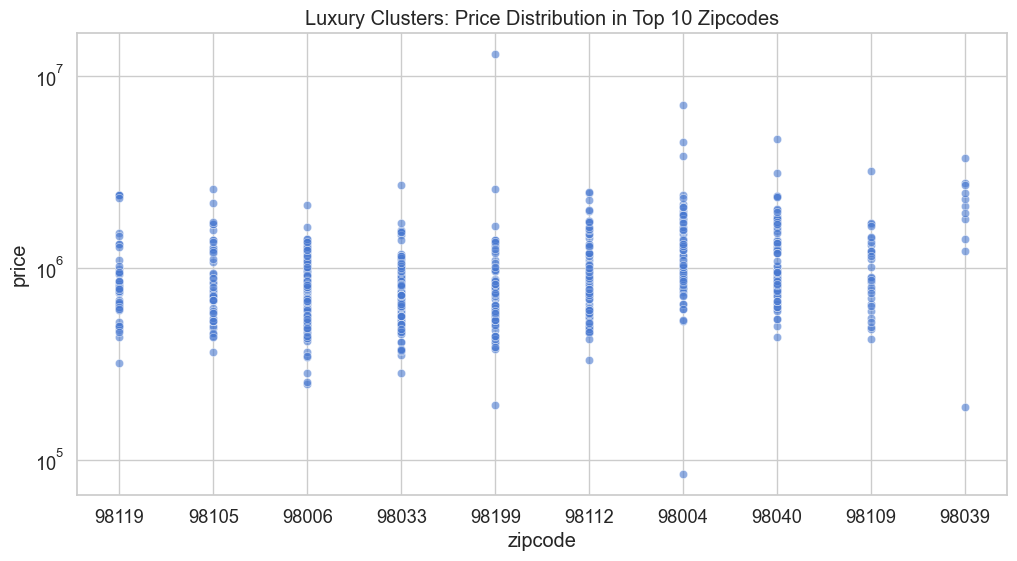

In [17]:
# focus only on top 10 luxury zips
luxury_zips = top_zips.index.tolist()
df_luxury = df[df["zipcode"].isin(luxury_zips)]

plt.figure(figsize=(12,6))
sns.scatterplot(x="zipcode", y="price", data=df_luxury, alpha=0.6)
plt.yscale("log")
plt.title("Luxury Clusters: Price Distribution in Top 10 Zipcodes")
plt.show()


In [18]:
zip_city = df.groupby(["city", "zipcode"])["price"].mean().reset_index().sort_values("price", ascending=False)

zip_city.head(15)


,city,zipcode,price
41,Medina,98039,2.046559e+06
5,Bellevue,98004,1.334484e+06
18,Clyde Hill,98004,1.321945e+06
102,Yarrow Point,98004,1.194838e+06
42,Mercer Island,98040,1.123818e+06
71,Seattle,98109,1.049846e+06
72,Seattle,98112,1.001604e+06
89,Seattle,98199,9.431587e+05
77,Seattle,98119,9.144415e+05
67,Seattle,98105,9.136670e+05


In [19]:
# top 10 cities
top_cities_list = top_cities.index.tolist()

# top 10 zips
top_zips_list = top_zips.index.tolist()

# see which top zips belong to which top cities
overlap = zip_city[zip_city["zipcode"].isin(top_zips_list) & zip_city["city"].isin(top_cities_list)]
overlap


,city,zipcode,price
41,Medina,98039,2.046559e+06
5,Bellevue,98004,1.334484e+06
18,Clyde Hill,98004,1.321945e+06
102,Yarrow Point,98004,1.194838e+06
42,Mercer Island,98040,1.123818e+06
7,Bellevue,98006,7.930526e+05
4,Beaux Arts Village,98004,7.450000e+05


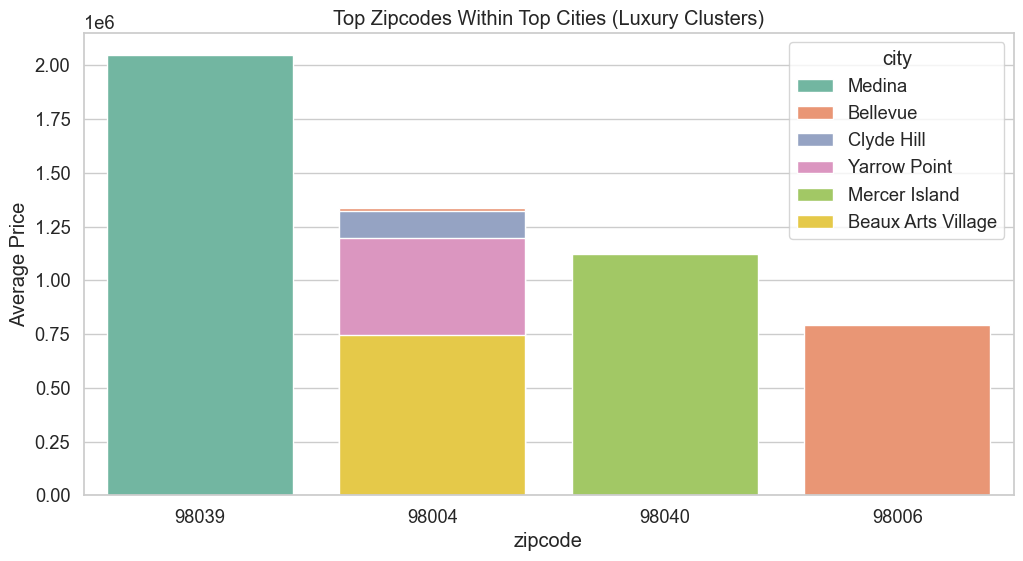

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x="zipcode", y="price", hue="city", data=overlap, dodge=False, palette="Set2")
plt.title("Top Zipcodes Within Top Cities (Luxury Clusters)")
plt.ylabel("Average Price")
plt.show()


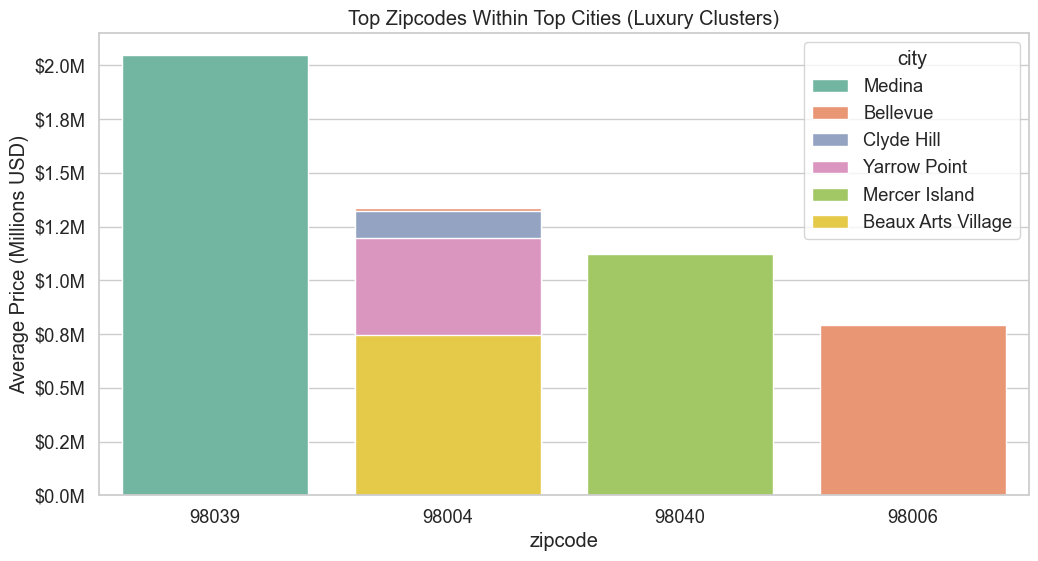

In [21]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
sns.barplot(x="zipcode", y="price", hue="city", data=overlap, dodge=False, palette="Set2")

plt.title("Top Zipcodes Within Top Cities (Luxury Clusters)")
plt.ylabel("Average Price (Millions USD)")

# format y-axis to show prices in millions
formatter = mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
